In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/rabi/Desktop/Project/HD/heart_2020_cleaned.csv")

# Exploratory Data Analysis (EDA)

In [3]:
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
data.size

5756310

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

<AxesSubplot:ylabel='HeartDisease'>

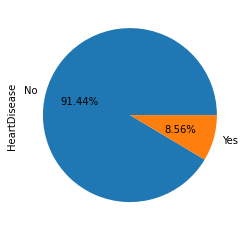

In [9]:
data['HeartDisease'].value_counts().plot.pie(autopct='%1.2f%%')

The percentage of people having heart disease is less.

/home/rabi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


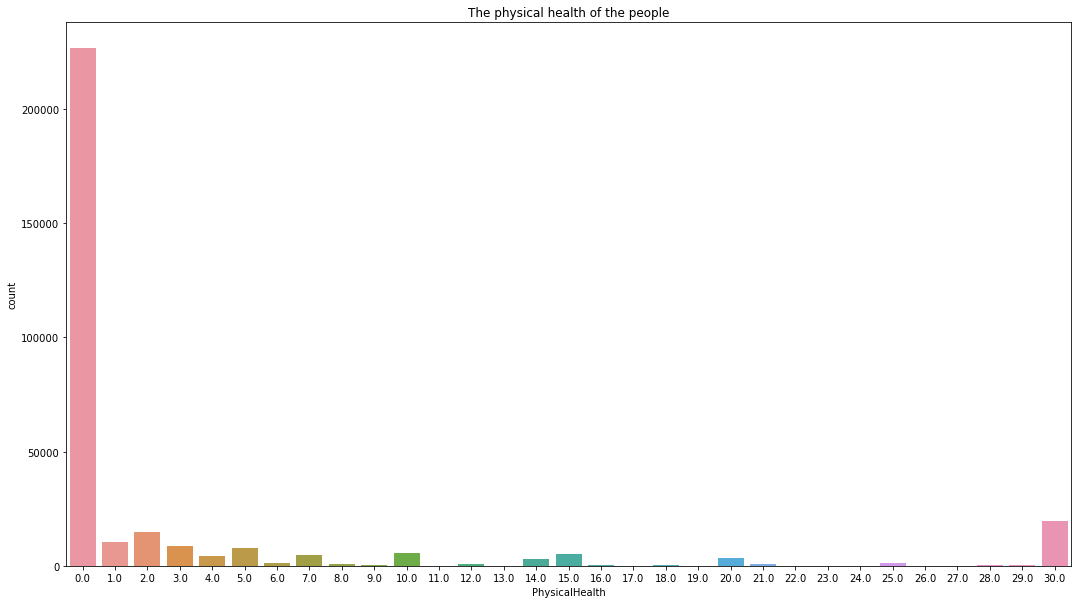

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(data['PhysicalHealth'])
plt.title("The physical health of the people")
plt.show()

In [11]:
data.loc[:,['PhysicalActivity','AgeCategory']]

,PhysicalActivity,AgeCategory
0,Yes,55-59
1,Yes,80 or older
2,Yes,65-69
3,No,75-79
4,Yes,40-44
...,...,...
319790,No,60-64
319791,Yes,35-39
319792,Yes,45-49
319793,No,25-29


In [12]:
Age_Activity = data.groupby(['PhysicalActivity', 'AgeCategory']).size().reset_index().rename(columns={0:'Ages_with_Activity'})

In [13]:
Age_Activity.head()

,PhysicalActivity,AgeCategory,Ages_with_Activity
0,No,18-24,3002
1,No,25-29,2617
2,No,30-34,2995
3,No,35-39,3590
4,No,40-44,3940


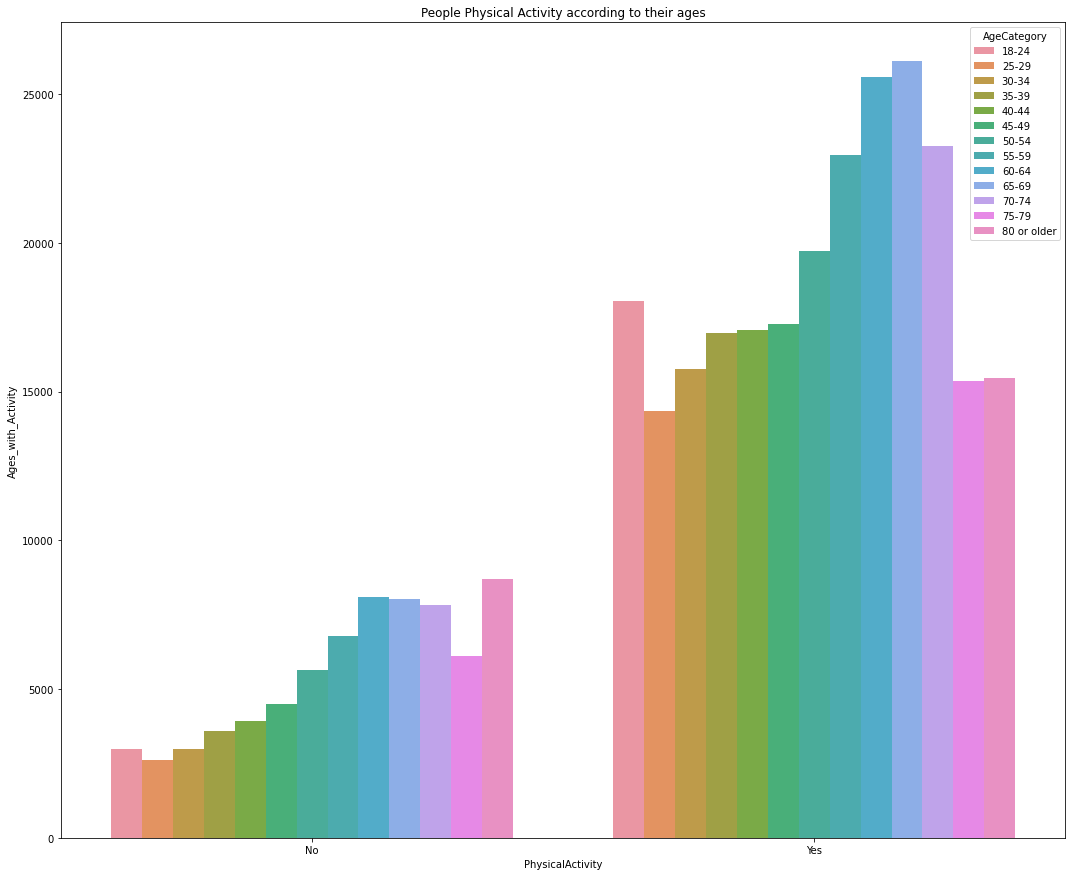

In [102]:
plt.figure(figsize=(18,15))
sns.barplot(x='PhysicalActivity', y= 'Ages_with_Activity', data=Age_Activity, hue='AgeCategory')
plt.title("People Physical Activity according to their ages")
plt.show()

Findings:
1. The data suggests that individuals aged between 65 and 69 exhibit a higher level of physical activity when compared to individuals in other age groups.
2. It is evident from the data that younger individuals, particularly those between the ages of 25 and 29, tend to engage in less physical activity in comparison to other age brackets.

In [15]:
data.loc[:,['DiffWalking','AgeCategory']]

,DiffWalking,AgeCategory
0,No,55-59
1,No,80 or older
2,No,65-69
3,No,75-79
4,Yes,40-44
...,...,...
319790,Yes,60-64
319791,No,35-39
319792,No,45-49
319793,No,25-29


In [16]:
walking_ages = data.groupby(['DiffWalking','AgeCategory']).size().reset_index().rename(columns={0:'Ages_with_walking'})

In [17]:
walking_ages.head(10)

,DiffWalking,AgeCategory,Ages_with_walking
0,No,18-24,20737
1,No,25-29,16591
2,No,30-34,18166
3,No,35-39,19581
4,No,40-44,19685
5,No,45-49,19885
6,No,50-54,22274
7,No,55-59,25107
8,No,60-64,27714
9,No,65-69,28130


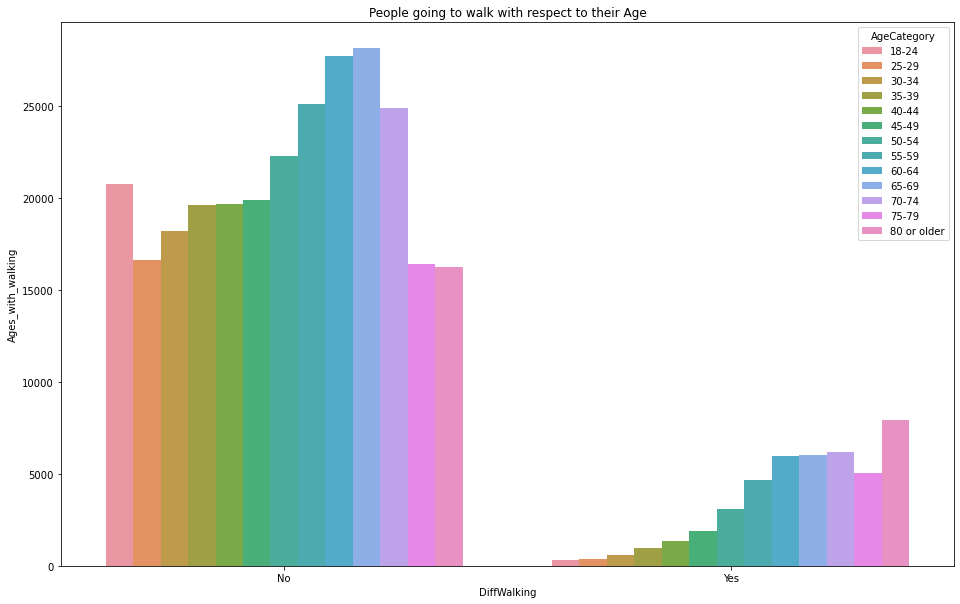

In [18]:
plt.figure(figsize=(16,10))
sns.barplot(x='DiffWalking',y='Ages_with_walking', data=walking_ages, hue='AgeCategory')
plt.title('People going to walk with respect Age')
plt.show()

Findings:
- The data makes it clear that walking is more difficult for older age groups when contrasted with younger people.

In [19]:
data.loc[:,['DiffWalking', 'AgeCategory', 'Race']]

,DiffWalking,AgeCategory,Race
0,No,55-59,White
1,No,80 or older,White
2,No,65-69,White
3,No,75-79,White
4,Yes,40-44,White
...,...,...,...
319790,Yes,60-64,Hispanic
319791,No,35-39,Hispanic
319792,No,45-49,Hispanic
319793,No,25-29,Hispanic


In [20]:
walking_ages_race = data.groupby(['DiffWalking','AgeCategory','Race']).size().reset_index().rename(columns={0:'Walikng_ages_with_races'})

In [21]:
walking_ages_race.head(10)

,DiffWalking,AgeCategory,Race,Walikng_ages_with_races
0,No,18-24,American Indian/Alaskan Native,365
1,No,18-24,Asian,1142
2,No,18-24,Black,1528
3,No,18-24,Hispanic,3473
4,No,18-24,Other,1168
5,No,18-24,White,13061
6,No,25-29,American Indian/Alaskan Native,312
7,No,25-29,Asian,840
8,No,25-29,Black,1323
9,No,25-29,Hispanic,2582


<function matplotlib.pyplot.show(close=None, block=None)>

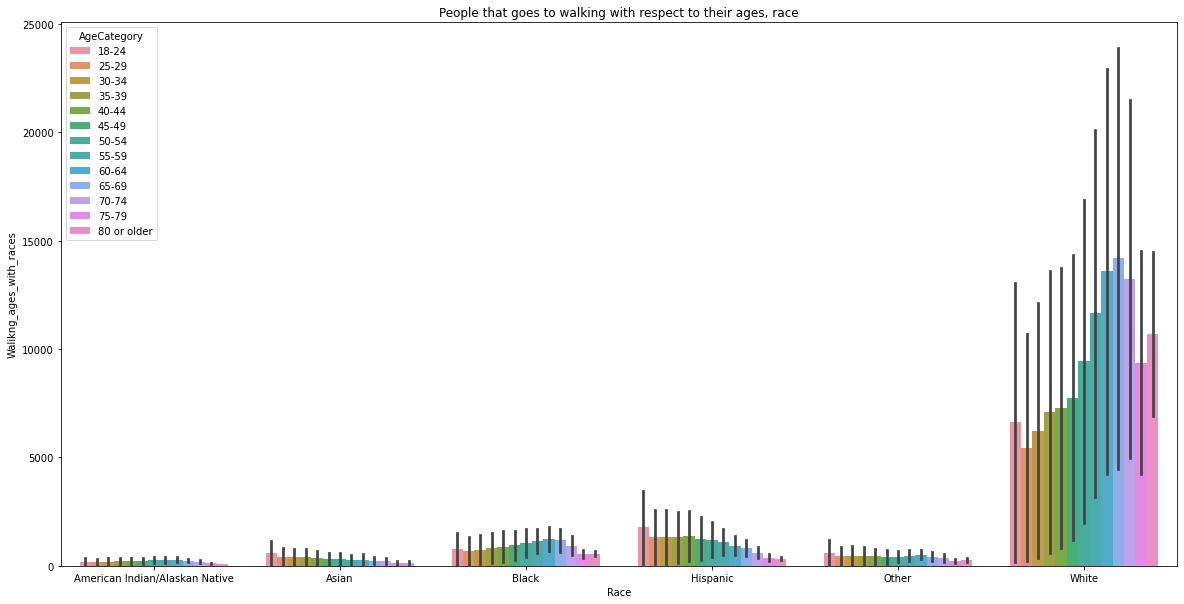

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x="Race", y="Walikng_ages_with_races", data=walking_ages_race, hue='AgeCategory')
plt.title("People that goes to walking with respect to their ages, race")
plt.show

Findings:
Walking Habits Across Races:
- Individuals identifying as White tend to engage in more walking during the ages of 65 to 69.
- Hispanic individuals show increased walking activity in the 18-24 age range.
- Among Black individuals, higher rates of walking are observed between the ages of 55 and 59.
- Asian individuals display heightened walking activity in the 18-24 age range.
- American Indian/Alaskan Native individuals exhibit increased walking habits between the ages of 50 and 54.

In [23]:
age=data['AgeCategory'].value_counts()

In [24]:
print(age)

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64


In [25]:
ages_index=data['AgeCategory'].unique()

In [26]:
len(ages_index)

13

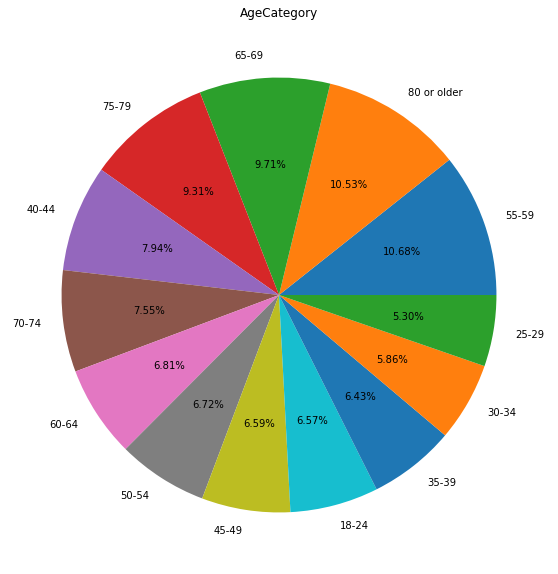

In [27]:
plt.figure(figsize=(18,10))
plt.pie(x=age, labels=ages_index,autopct='%1.2f%%')
plt.title("AgeCategory")
plt.show()

Findings:
Data contains:
- Highest age group = 55-59
- Lowest age group = 25-29

/home/rabi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


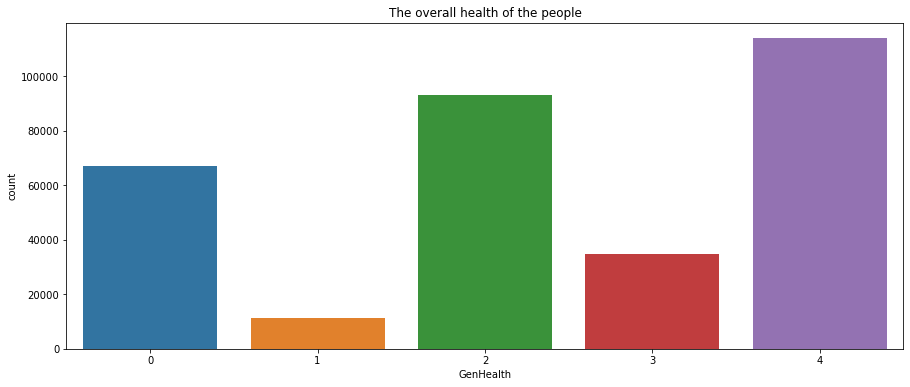

In [103]:
plt.figure(figsize=(15,6))
sns.countplot(data['GenHealth'])
plt.title('The overall health of the people')
plt.show()

Overall most of the health of the people is alright

In [104]:
race = data['Race'].value_counts()

In [105]:
print(race)

5    245212
0     27446
4     22939
1     10928
3      8068
2      5202
Name: Race, dtype: int64


In [106]:
race_labels=data['Race'].value_counts().index

In [107]:
print(race_labels)

Int64Index([5, 0, 4, 1, 3, 2], dtype='int64')


([<matplotlib.patches.Wedge at 0x7fb0811f4a00>,
 [Text(-0.8177183349414112, 0.7357558866231695, '5'),
  Text(0.40294781406205354, -1.0235394761036885, '0'),
  Text(0.8407743180711724, -0.7092944001414048, '4'),
  Text(1.0263230761335127, -0.39580417303995685, '1'),
  Text(1.0819384459860752, -0.198517503251569, '3'),
  Text(1.098563961018497, -0.056189176460867775, '2')],
 [Text(-0.44602818269531513, 0.401321392703547, '76.68%'),
  Text(0.21978971676112008, -0.5582942596929209, '8.58%'),
  Text(0.45860417349336674, -0.38688785462258435, '7.17%'),
  Text(0.5598125869819159, -0.21589318529452192, '3.42%'),
  Text(0.5901482432651319, -0.1082822745008558, '2.52%'),
  Text(0.5992167060100891, -0.030648641705927872, '1.63%')])

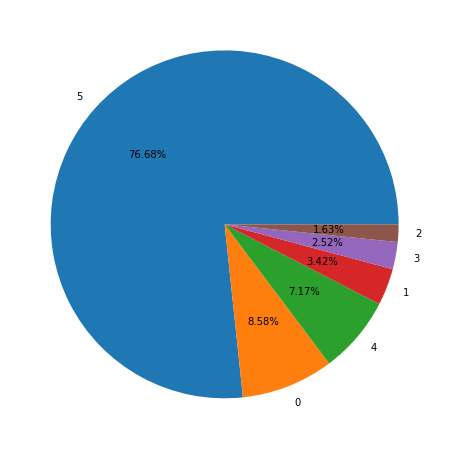

In [108]:
plt.figure(figsize=(18,8))
plt.pie(x=race,labels=race_labels,autopct='%1.2f%%')

The dataset ranks racial groups in terms of population from largest to smallest as follows:
1. White
2. Hispanic
3. Black
4. Other
5. Asian
6. American Indian/Alaskan Native

/home/rabi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

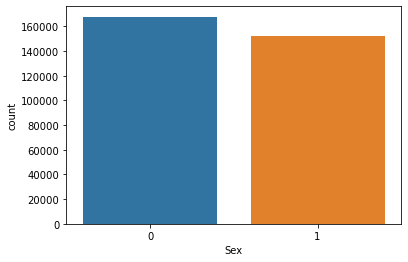

In [109]:
sns.countplot(data['Sex'])

The number of female if higher than Male

In [35]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [36]:
races = data.groupby(['Race', 'AgeCategory']).size().reset_index().rename(columns={0:'Ages_with_races'})

In [37]:
print(races)

                              Race  AgeCategory  Ages_with_races
0   American Indian/Alaskan Native        18-24              370
1   American Indian/Alaskan Native        25-29              322
2   American Indian/Alaskan Native        30-34              365
3   American Indian/Alaskan Native        35-39              420
4   American Indian/Alaskan Native        40-44              410
..                             ...          ...              ...
73                           White        60-64            27182
74                           White        65-69            28377
75                           White        70-74            26468
76                           White        75-79            18740
77                           White  80 or older            21394

[78 rows x 3 columns]


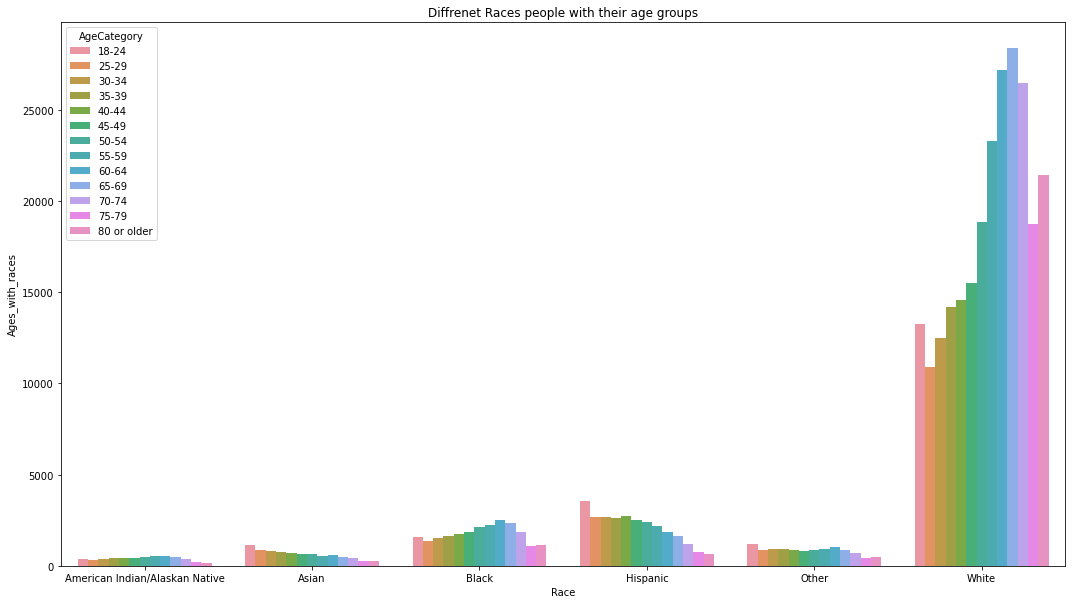

In [110]:
plt.figure(figsize=(18,10))
sns.barplot(x='Race', y='Ages_with_races',data=races, hue='AgeCategory')
plt.title("Diffrenet Races people with their age groups")
plt.show()

In [39]:
data.loc[:,['Race','Diabetic']]

,Race,Diabetic
0,White,Yes
1,White,No
2,White,Yes
3,White,No
4,White,No
...,...,...
319790,Hispanic,Yes
319791,Hispanic,No
319792,Hispanic,No
319793,Hispanic,No


In [40]:
Diabetic=data.groupby(['Race','Diabetic']).size().reset_index().rename(columns={0:'Diabetic_with_ages'})

In [41]:
Diabetic

,Race,Diabetic,Diabetic_with_ages
0,American Indian/Alaskan Native,No,3968
1,American Indian/Alaskan Native,"No, borderline diabetes",159
2,American Indian/Alaskan Native,Yes,1021
3,American Indian/Alaskan Native,Yes (during pregnancy),54
4,Asian,No,6850
5,Asian,"No, borderline diabetes",339
6,Asian,Yes,782
7,Asian,Yes (during pregnancy),97
8,Black,No,17684
9,Black,"No, borderline diabetes",627


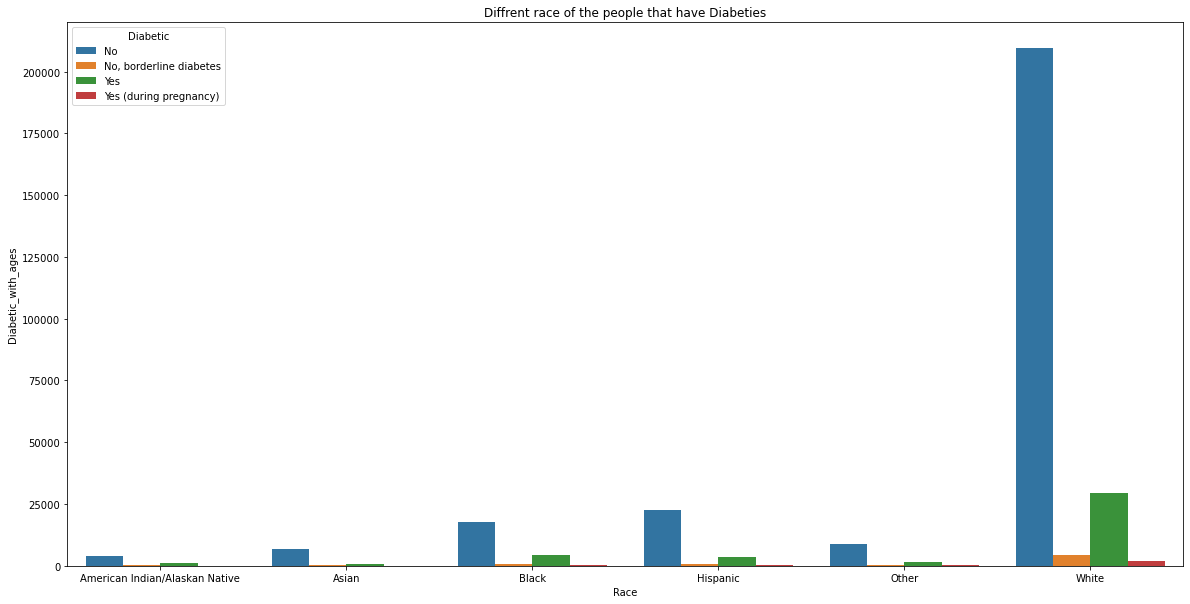

In [111]:
plt.figure(figsize=(20,10))
sns.barplot(x='Race',y='Diabetic_with_ages', data=Diabetic, hue='Diabetic')
plt.title("Diffrent race of the people that have Diabeties")
plt.show()

Findings
- The highest prevalence of diabetes is found among white individuals.
- Conversely, black, American Indian, and Asian individuals exhibit a lower incidence of diabetes.
- Interestingly, among white individuals, some cases of diabetes appear to be associated with pregnancy duration.

In [112]:
data.loc[:,['AgeCategory','Sex','Asthma']]

,AgeCategory,Sex,Asthma
0,7,0,1
1,12,0,0
2,9,1,1
3,11,0,0
4,4,0,0
...,...,...,...
319790,8,1,1
319791,3,1,1
319792,5,0,0
319793,1,0,0


In [44]:
Asthma = data.groupby(['Asthma','AgeCategory','Sex']).size().reset_index().rename(columns={0:'Ages_with_Asthma'})

In [45]:
Asthma

,Asthma,AgeCategory,Sex,Ages_with_Asthma
0,No,18-24,Female,7608
1,No,18-24,Male,9729
2,No,25-29,Female,6446
3,No,25-29,Male,7641
4,No,30-34,Female,7529
5,No,30-34,Male,8379
6,No,35-39,Female,8750
7,No,35-39,Male,8921
8,No,40-44,Female,9021
9,No,40-44,Male,8920


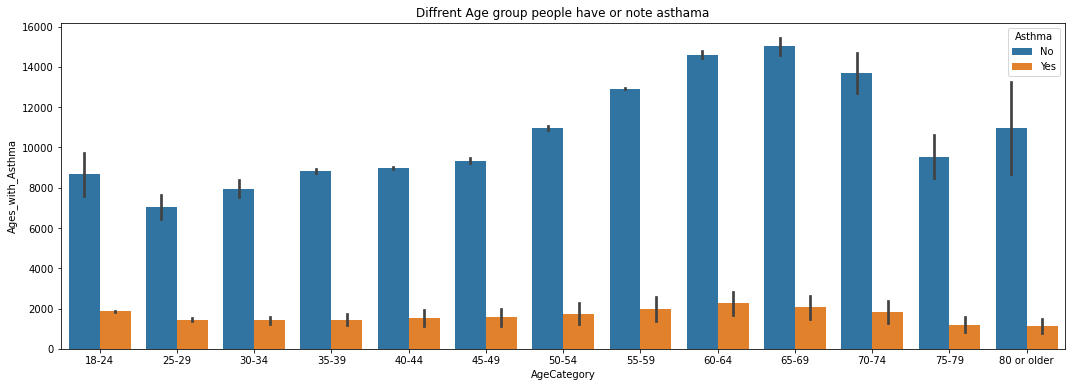

In [113]:
plt.figure(figsize=(18,6))
sns.barplot(x='AgeCategory', y='Ages_with_Asthma', data=Asthma, hue='Asthma')
plt.title("Diffrent Age group people have or note asthama")
plt.show()

Findings:
- Analyzing the data reveals a higher prevalence of asthma issues within the age groups 60-64 and 65-69.


/home/rabi/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

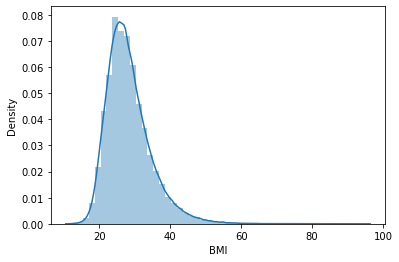

In [47]:
sns.distplot(data['BMI'],hist=True)

In [48]:
female_disease = data[data['Sex']=='Female'].groupby(['KidneyDisease','SkinCancer']).size().reset_index().rename(columns={0:'Skincancer_with_KidneyDisease'})

In [49]:
female_disease

,KidneyDisease,SkinCancer,Skincancer_with_KidneyDisease
0,No,No,147340
1,No,Yes,14011
2,Yes,No,5442
3,Yes,Yes,1012


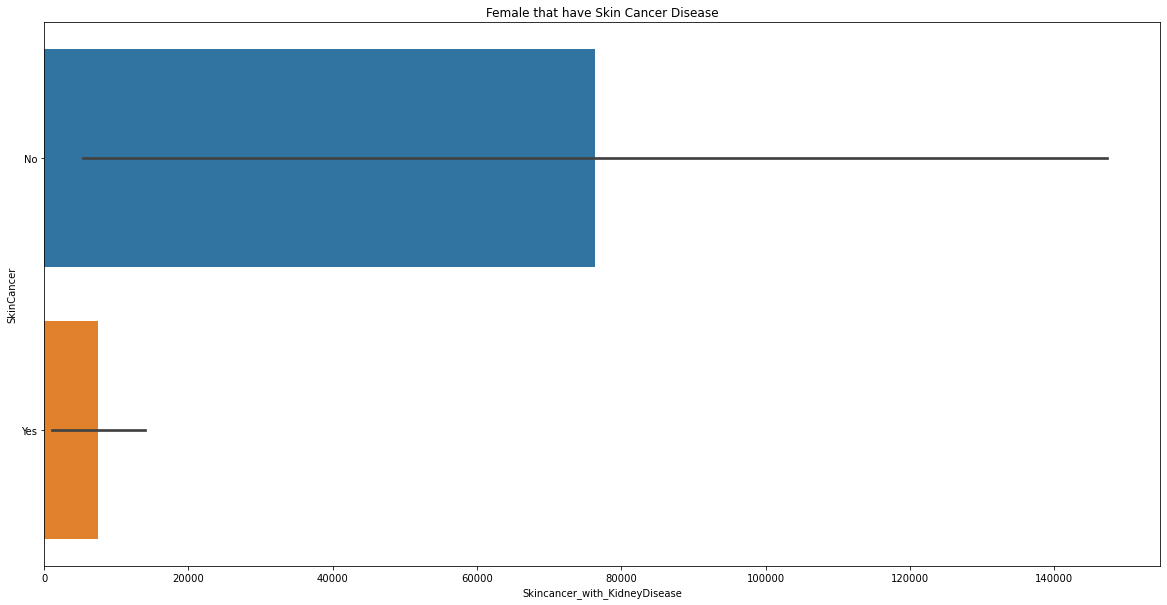

In [118]:
plt.figure(figsize=(20,10))
sns.barplot(y='SkinCancer', x='Skincancer_with_KidneyDisease',data=female_disease)
plt.title('Female that have Skin Cancer Disease')
plt.show()

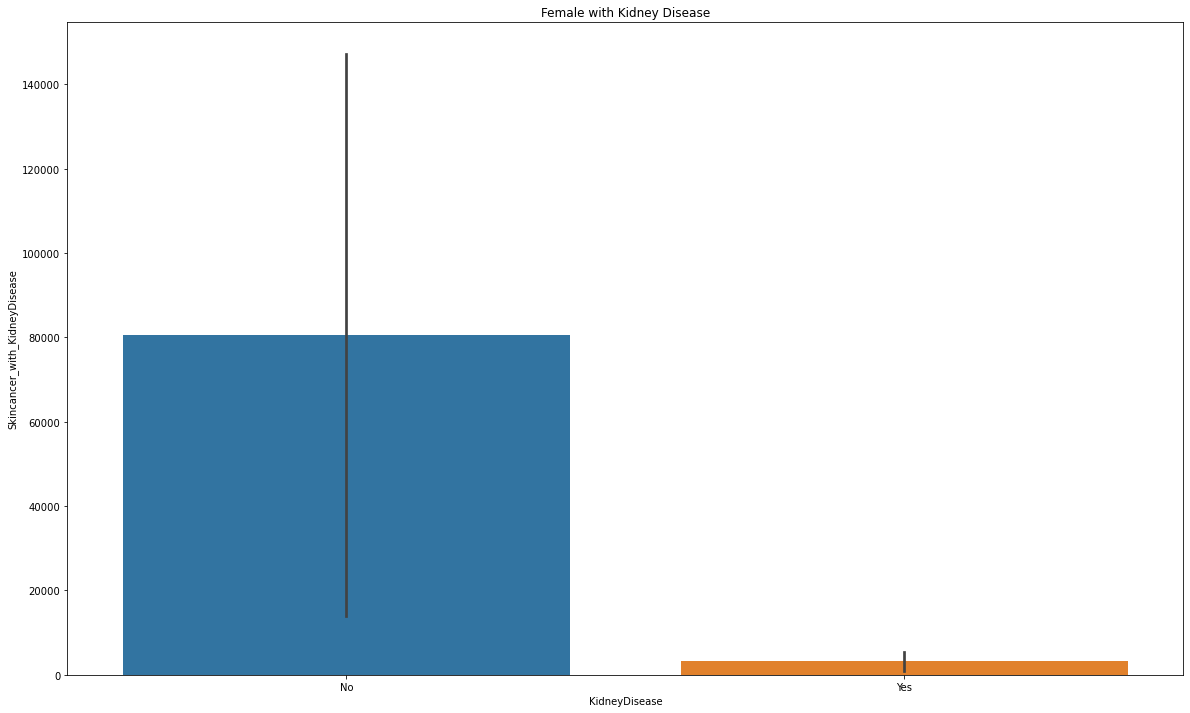

In [51]:
plt.figure(figsize=(20,12))
sns.barplot(x='KidneyDisease', y='Skincancer_with_KidneyDisease', data=female_disease)
plt.title('Female with Kidney Disease')
plt.show()

Findings:
- From data it indicate that a majority of females experience skin cancer, while a smaller percentage is affected by kidney disease.

In [52]:
Smoker_Drinker = data[data['Sex']=='Female'].groupby(['Smoking','AlcoholDrinking']).size().reset_index().rename(columns={0:'Smoking_and_Drinking'})

In [53]:
Smoker_Drinker

,Smoking,AlcoholDrinking,Smoking_and_Drinking
0,No,No,100428
1,No,Yes,4848
2,Yes,No,56119
3,Yes,Yes,6410


Text(0.5, 1.0, 'The female that Smokes and Drinks Alchol')

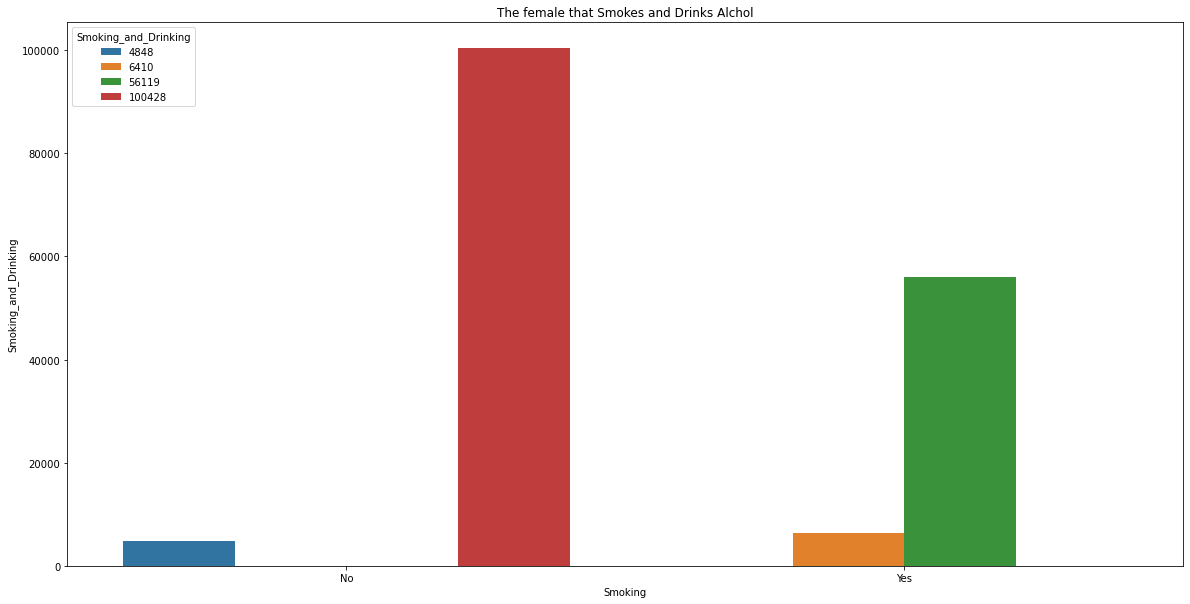

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x='Smoking', y='Smoking_and_Drinking', data=Smoker_Drinker, hue='Smoking_and_Drinking')
plt.title('The female that Smokes and Drinks Alchol')

Findings:
- Among female candidates, a stronger inclination towards smoking rather than drinking is noticeable. However, it's important to acknowledge that a significant number of candidates still express a preference for both smoking and drinking.

In [55]:
Male_Smoker = data[data['Sex']=='Male'].groupby(['Smoking','AlcoholDrinking']).size().reset_index().rename(columns={0:'Smoking_and_Drinking'})

In [56]:
Male_Smoker

,Smoking,AlcoholDrinking,Smoking_and_Drinking
0,No,No,79097
1,No,Yes,3514
2,Yes,No,62374
3,Yes,Yes,7005


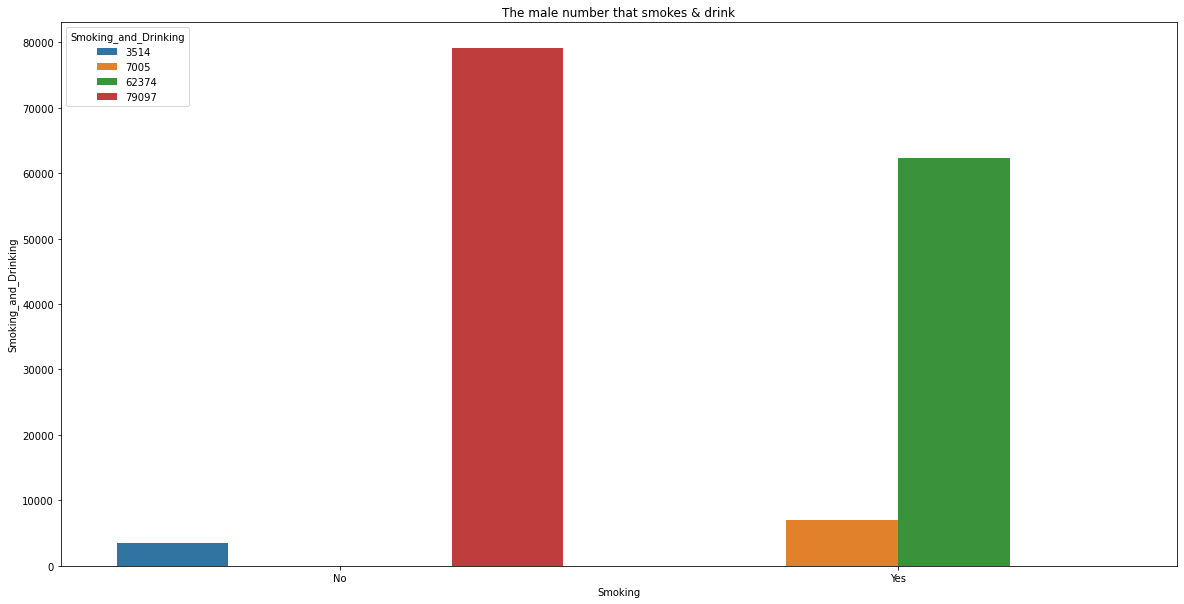

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x='Smoking', y='Smoking_and_Drinking', data=Male_Smoker,hue='Smoking_and_Drinking')
plt.title('The male number that smokes & drink')
plt.show()

Findings:
- Male individuals appear to have a higher inclination towards smoking compared to drinking. Nonetheless, a considerable number of male candidates still exhibit a preference for both smoking and drinking.

In [58]:
Smoker_ages = data.groupby(['AgeCategory','Smoking']).size().reset_index().rename(columns={0:'Smoker_withtheir_Ages'})

In [59]:
Smoker_ages

,AgeCategory,Smoking,Smoker_withtheir_Ages
0,18-24,No,17780
1,18-24,Yes,3284
2,25-29,No,11801
3,25-29,Yes,5154
4,30-34,No,11581
5,30-34,Yes,7172
6,35-39,No,11908
7,35-39,Yes,8642
8,40-44,No,11925
9,40-44,Yes,9081


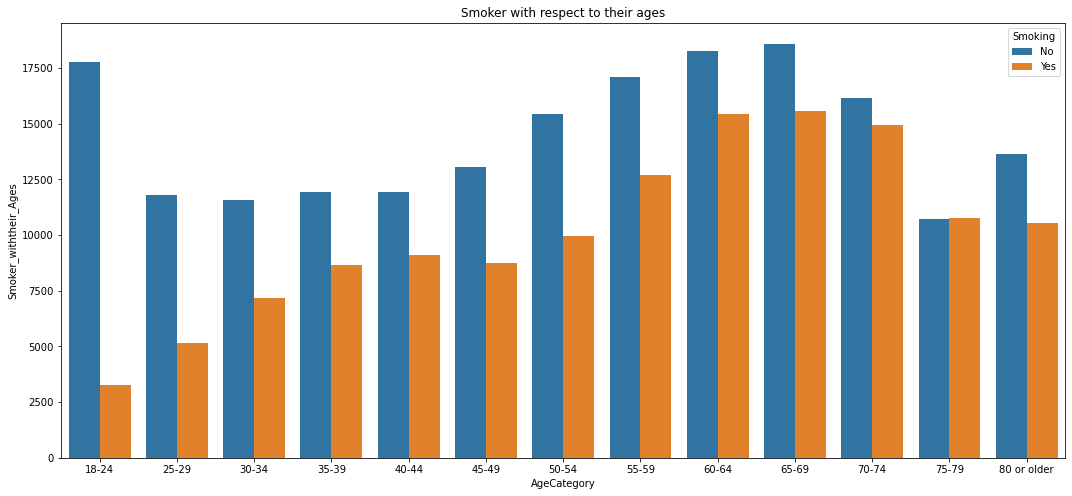

In [60]:
plt.figure(figsize=(18,8))
sns.barplot(x='AgeCategory', y='Smoker_withtheir_Ages', data=Smoker_ages, hue='Smoking')
plt.title('Smoker with respect to their ages')
plt.show()

Findings:
- The graph above highlights a significant concentration of smokers within the age brackets of 60-64 and 65-69. These age groups notably show a higher propensity for smoking.

In [61]:
Drinker_ages = data.groupby(['AgeCategory','AlcoholDrinking']).size().reset_index().rename(columns={0:'Diffrent_Ages_Drinker'})

In [62]:
Drinker_ages

,AgeCategory,AlcoholDrinking,Diffrent_Ages_Drinker
0,18-24,No,19543
1,18-24,Yes,1521
2,25-29,No,15384
3,25-29,Yes,1571
4,30-34,No,17175
5,30-34,Yes,1578
6,35-39,No,18725
7,35-39,Yes,1825
8,40-44,No,19200
9,40-44,Yes,1806


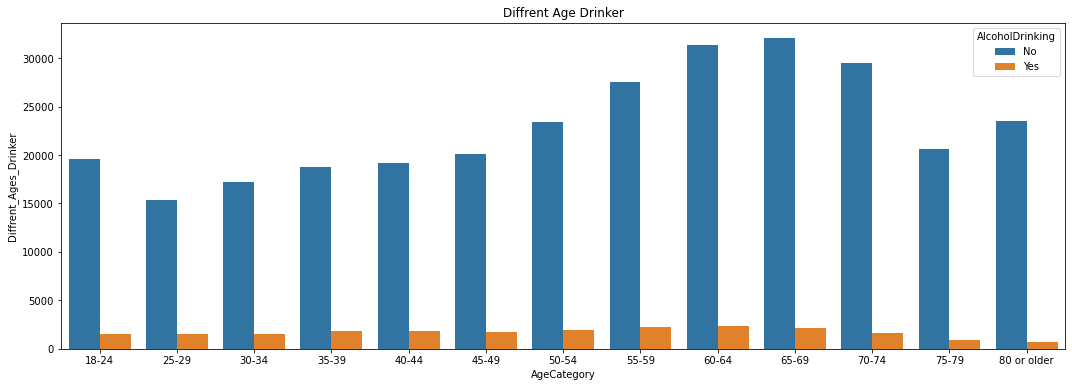

In [63]:
plt.figure(figsize=(18,6))
sns.barplot(x='AgeCategory', y='Diffrent_Ages_Drinker', data=Drinker_ages, hue='AlcoholDrinking')
plt.title('Diffrent Age Drinker')
plt.show()

Findings
- The graph illustrates that individuals in the age ranges of 60-64 and 55-59 have the highest incidence of alcohol consumption.

In [64]:
Ages_with_HeartDisease = data.groupby(['AgeCategory','HeartDisease']).size().reset_index().rename(columns={0:'Diffrent_Ages_with_HeartDisease'})

In [65]:
Ages_with_HeartDisease

,AgeCategory,HeartDisease,Diffrent_Ages_with_HeartDisease
0,18-24,No,20934
1,18-24,Yes,130
2,25-29,No,16822
3,25-29,Yes,133
4,30-34,No,18527
5,30-34,Yes,226
6,35-39,No,20254
7,35-39,Yes,296
8,40-44,No,20520
9,40-44,Yes,486


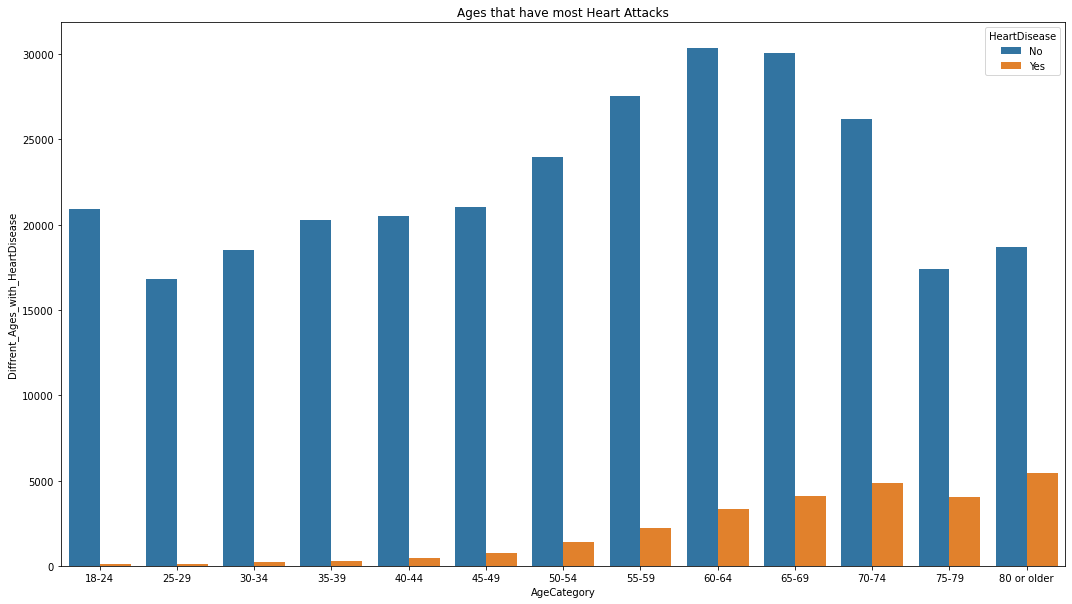

In [66]:
plt.figure(figsize=(18,10))
sns.barplot(x='AgeCategory', y='Diffrent_Ages_with_HeartDisease', data=Ages_with_HeartDisease, hue='HeartDisease')
plt.title('Ages that have most Heart Attacks')
plt.show()

Findings:
- The plotted data indicates a peak occurrence of heart disease among individuals aged 80 or older, followed by another notable increase in the 70-74 age group.

In [67]:
Health = data.groupby(['AgeCategory','GenHealth']).size().reset_index().rename(columns={0:'Diffrent_Ages_Health'})

In [68]:
Health

,AgeCategory,GenHealth,Diffrent_Ages_Health
0,18-24,Excellent,6529
1,18-24,Fair,1124
2,18-24,Good,5078
3,18-24,Poor,148
4,18-24,Very good,8185
...,...,...,...
60,80 or older,Excellent,2788
61,80 or older,Fair,3934
62,80 or older,Good,8497
63,80 or older,Poor,1434


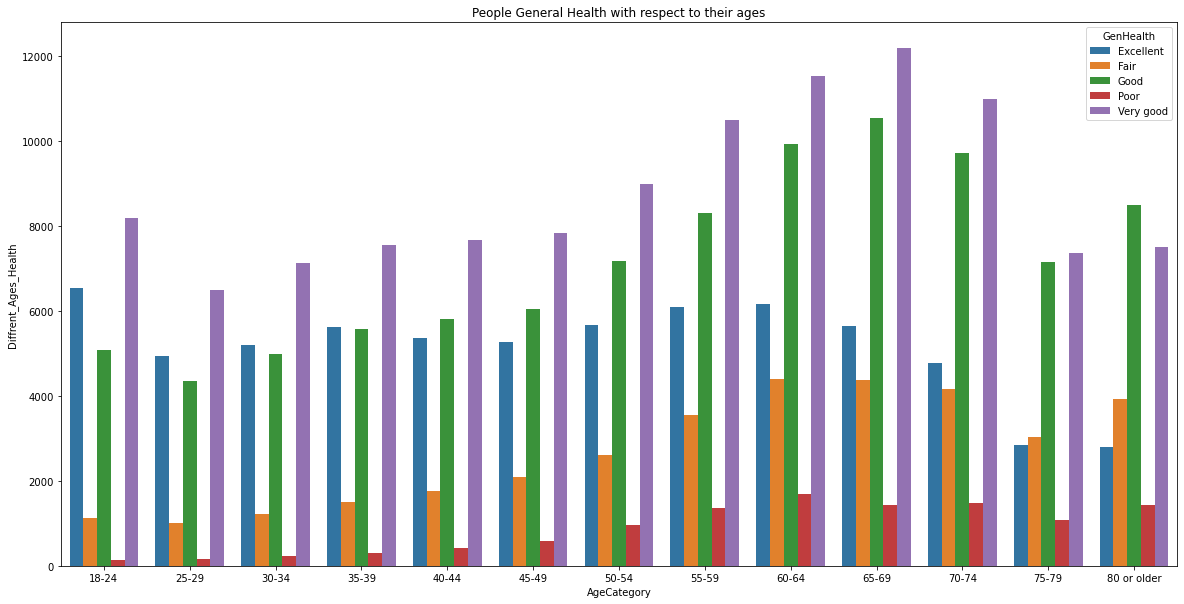

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(x='AgeCategory', y='Diffrent_Ages_Health', data=Health, hue='GenHealth')
plt.title("People General Health with respect to their ages")
plt.show()

Findings:
- Based on a visual inspection of the plot, it seems that most age groups generally exhibit good health. Nevertheless, it's worth noting that the age categories showing relatively poorer health are 60-64, 70-74, and those aged 80 and above.

<AxesSubplot:ylabel='PhysicalActivity'>

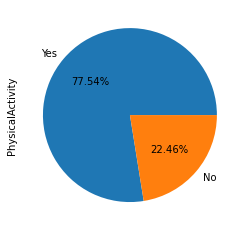

In [70]:
data.PhysicalActivity.value_counts().plot.pie(autopct='%1.2f%%')

In [71]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [72]:
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [73]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [74]:
data['Smoking'] = data['Smoking'].map({'Yes':1, 'No':0})
data['AlcoholDrinking'] = data['AlcoholDrinking'].map({'Yes':1,'No':0})
data['Stroke'] = data['Stroke'].map({'Yes':1,'No':0})
data['DiffWalking'] = data['DiffWalking'].map({'Yes':1, 'No':0})
data['Sex'] = data['Sex'].map({'Male':1, 'Female':0})
data['Race']=data['Race'].map({'White':5, 'Black':4, 'Asian':3, 
                               'American Indian/Alaskan Native':2,'Other':1, 
                               'Hispanic':0})
data['Diabetic'] = data['Diabetic'].map({'Yes':1, 'No':0})
data['PhysicalActivity'] = data['PhysicalActivity'].map({'Yes':1, 'No':0})
data['GenHealth']=data['GenHealth'].map({'Very good':4, 'Fair':3, 'Good':2,
                                         'Poor':1, 'Excellent':0})
data['Asthma'] = data['Asthma'].map({'Yes':1, 'No':0})
data['KidneyDisease'] = data['KidneyDisease'].map({'Yes':1, 'No':0})
data['SkinCancer'] = data['SkinCancer'].map({'Yes':1, 'No':0})


In [75]:
data.replace('80 or older','80-90', inplace=True)


In [76]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,0,0,3.0,30.0,0,0,55-59,5,1.0,1,4,5.0,1,0,1
1,No,20.34,0,0,1,0.0,0.0,0,0,80-90,5,0.0,1,4,7.0,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,1,65-69,5,1.0,1,3,8.0,1,0,0
3,No,24.21,0,0,0,0.0,0.0,0,0,75-79,5,0.0,0,2,6.0,0,0,1
4,No,23.71,0,0,0,28.0,0.0,1,0,40-44,5,0.0,1,4,8.0,0,0,0


In [77]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                  int64
Diabetic            float64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

# Categorical Label Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [79]:
data['Sex'] = le.fit_transform(data['Sex'])
data['AgeCategory'] = le.fit_transform(data['AgeCategory'])
data['Race'] = le.fit_transform(data['Race'])
data['Diabetic'] = le.fit_transform(data['Diabetic'])
data['GenHeath'] = le.fit_transform(data['GenHealth'])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

# Train Test Split

In [81]:
X = data.drop(['HeartDisease'], axis=1)
Y = data['HeartDisease']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [84]:
print(X.shape, X_train.shape, X_test.shape)

(319795, 18) (255836, 18) (63959, 18)


In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

/home/rabi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [87]:
logistic_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
print('The accuracy test score is', model.score(X_test,Y_test))
print('The accuracy test score is', model.score(X_train,Y_train))

The accuracy test score is 0.9136165355931143
The accuracy test score is 0.9142145749620851


In [90]:
print('The accuracy score is', accuracy_score(Y_test,logistic_pred))

The accuracy score is 0.9136165355931143


In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dec = DecisionTreeClassifier(criterion='entropy', splitter='random',
        max_depth = 100,
        min_samples_split = 5,
        min_samples_leaf = 4,
        min_weight_fraction_leaf = 0.5,
        max_features = None,
        random_state = 0,
        max_leaf_nodes = None,
        min_impurity_decrease = 0.0,
        class_weight = None,
        ccp_alpha=1.5)
dec.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=1.5, criterion='entropy', max_depth=100,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.5, random_state=0,
                       splitter='random')

In [93]:
print('The test score is', dec.score(X_test,  Y_test))
print('The train score is', dec.score(X_train, Y_train))

The test score is 0.9143982864022264
The train score is 0.9144061039103175


In [94]:
dec_pred  = dec.predict(X_test)

In [95]:
print('The accuracy score is ', accuracy_score(Y_test,dec_pred))

The accuracy score is  0.9143982864022264


In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier(n_estimators=150,
                criterion='entropy',
                max_depth=2,
                min_samples_split=5,
                min_samples_leaf=2,
                min_weight_fraction_leaf=0.0,
                max_features='auto',
                max_leaf_nodes=None,
                min_impurity_decrease=0.0,
                bootstrap=True,
                oob_score=False,
                n_jobs=-1,
                random_state=None,
                verbose=0,
                warm_start=False,
                class_weight=None,
                ccp_alpha=0.0,
                max_samples=None)
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150, n_jobs=-1)

In [98]:
rf_pred = rf.predict(X_test)

In [99]:
print('the train score is', rf.score(X_train,Y_train))
print('the test score is', rf.score(X_test, Y_test))

the train score is 0.9144061039103175
the test score is 0.9143982864022264


In [100]:
print('The accuracy score is', accuracy_score(Y_test,rf_pred))

The accuracy score is 0.9143982864022264


# Overall Accuracy Score of the entire Models

In [101]:
print('The accuracy score is', accuracy_score(Y_test,logistic_pred))
print('The accuracy score is ', accuracy_score(Y_test,dec_pred))
print('The accuracy score is', accuracy_score(Y_test,rf_pred))

The accuracy score is 0.9136165355931143
The accuracy score is  0.9143982864022264
The accuracy score is 0.9143982864022264
